In [5]:
from __future__ import print_function
from csky.ipyconfig import *
from csky import bk, analysis, coord, dists, hyp, inj, llh, pdf, selections, trial, utils
import csky as cy
import histlite as hl
import healpy as hp
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
#from icecube import astro

mp_cpus = 15
mrichman_mpl()

In [3]:
sindec_array_30 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sindec_array_30bins.npy')

sens_0 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_0ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_0_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_0ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
sens_1 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_1ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_1_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_1ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
sens_2 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_2ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_2_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_2ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
sens_3 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_3ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_3_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_3ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
sens_4 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_4ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_4_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_4ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
#sens_5 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_5ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
sens_5_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_5ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')

disc_0 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_0ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_0_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_0ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
disc_1 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_1ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_1_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_1ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
disc_2 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_2ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_2_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_2ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
disc_3 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_3ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_3_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_3ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
disc_4 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_4ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_4_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_4ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')
disc_5 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_5ext_llhextNone_cutnsigNone_gamma2_sigsubFalse_30bins.npy')
disc_5_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_5ext_llhextNone_cutnsigNone_gamma2_sigsubTrue_30bins.npy')

disc_llhextNone = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_llhextNone.npy')
disc_llhext0 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_llhext0.npy')
extension_array = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/extension_array.npy')


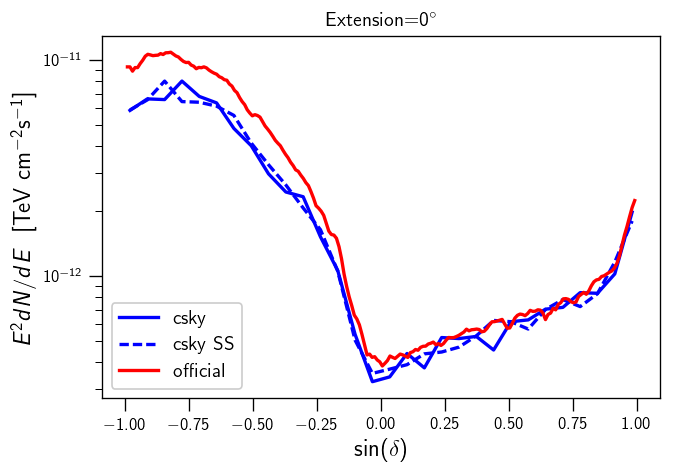

In [6]:
repo = selections.mrichman_repo

fig, ax = plt.subplots ()
plt.semilogy(sindec_array_30,sens_0,label=r'csky',color='blue')
plt.semilogy(sindec_array_30,sens_0_ss,label=r'csky SS', color='blue',linestyle='--')
sd,phi = repo.get_performance('sens_E200_ps7yr')[:2]
plt.semilogy(sd,phi,color='r',label=r'official')
plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.title(r'Extension=${0}^{\circ}$')
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

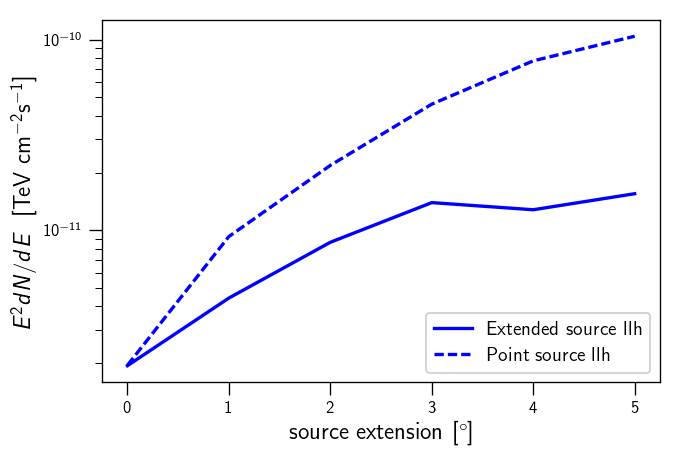

In [7]:
fig, ax = plt.subplots ()
#plt.semilogy(testdec,test,label=r'test',color='green')

plt.semilogy(extension_array,disc_llhextNone,label=r'Extended source llh',color='blue')
plt.semilogy(extension_array,disc_llhext0,label=r'Point source llh', color='blue',linestyle='--')
plt.legend(loc='lower right',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.xlabel(r'source extension $[{}^{\circ}]$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

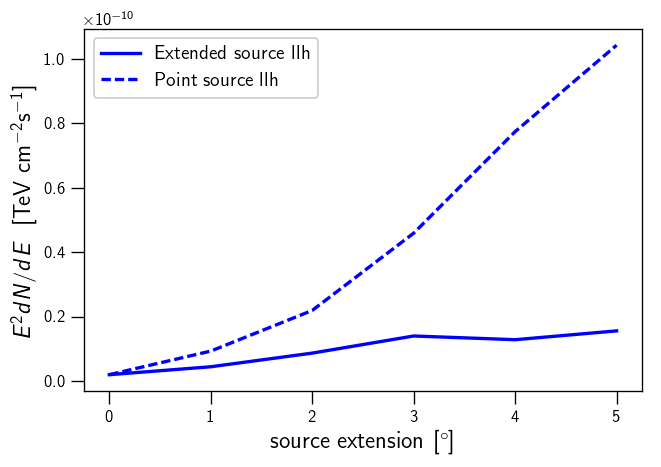

In [8]:
fig, ax = plt.subplots ()
#plt.semilogy(testdec,test,label=r'test',color='green')

plt.plot(extension_array,disc_llhextNone,label=r'Extended source llh',color='blue')
plt.plot(extension_array,disc_llhext0,label=r'Point source llh', color='blue',linestyle='--')
plt.legend(loc='upper left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.xlabel(r'source extension $[{}^{\circ}]$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

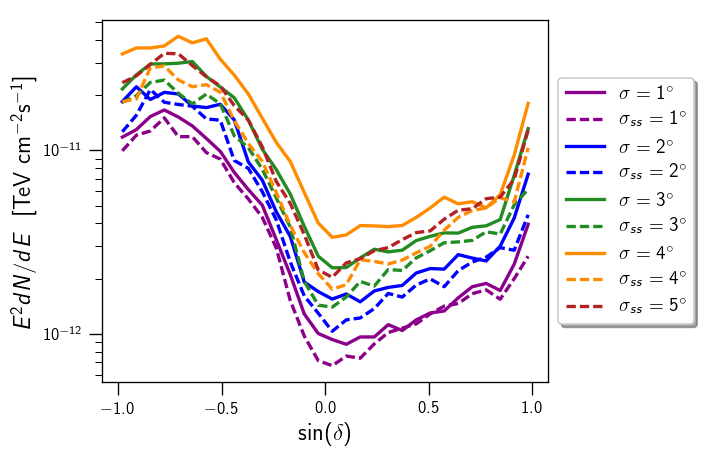

In [16]:
fig, ax = plt.subplots ()
#plt.semilogy(sd,phi,color='0.5',label=r'Official ${0}^{\circ}$')
#plt.semilogy(sindec_array_30,sens_0,label=r'$\sigma=0^{\circ}$',color='black')
#plt.semilogy(sindec_array_30,sens_0_ss,label=r'$\sigma_{ss}=0^{\circ}$', color='black',linestyle='--')
plt.semilogy(sindec_array_30,sens_1,label=r'$\sigma=1^{\circ}$', color='darkmagenta', linestyle='-')
plt.semilogy(sindec_array_30,sens_1_ss,label=r'$\sigma_{ss}=1^{\circ}$', color='darkmagenta', linestyle='--')
plt.semilogy(sindec_array_30,sens_2,label=r'$\sigma=2^{\circ}$', color='blue')
plt.semilogy(sindec_array_30,sens_2_ss,label=r'$\sigma_{ss}=2^{\circ}$', color='blue', linestyle='--')
plt.semilogy(sindec_array_30,sens_3,label=r'$\sigma=3^{\circ}$', color='forestgreen')
plt.semilogy(sindec_array_30,sens_3_ss,label=r'$\sigma_{ss}=3^{\circ}$', color='forestgreen', linestyle='--')
plt.semilogy(sindec_array_30,sens_4,label=r'$\sigma=4^{\circ}$', color='darkorange')
plt.semilogy(sindec_array_30,sens_4_ss,label=r'$\sigma_{ss}=4^{\circ}$', color='darkorange', linestyle='--')
#plt.semilogy(sindec_array_30,sens_5,label=r'$\sigma=5^{\circ}$', color='firebrick')
plt.semilogy(sindec_array_30,sens_5_ss,label=r'$\sigma_{ss}=5^{\circ}$', color='firebrick', linestyle='--')


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1, fontsize=11.5)

#plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

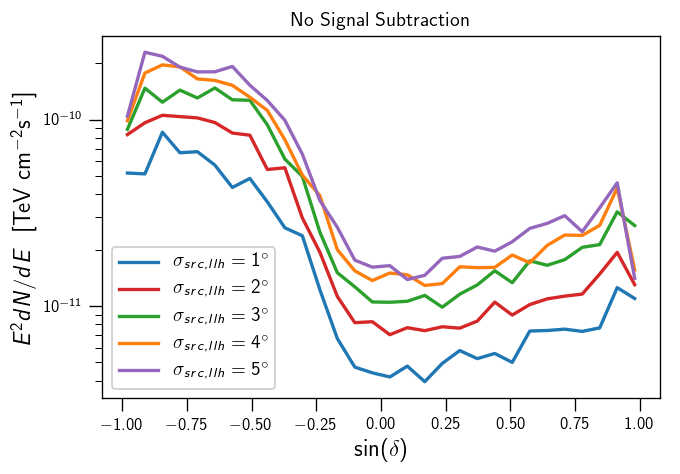

In [14]:
fig, ax = plt.subplots ()
plt.semilogy(sindec_array_30,disc_1,label=r'$\sigma_{src,llh}=1^{\circ}$')
plt.semilogy(sindec_array_30,disc_2,label=r'$\sigma_{src,llh}=2^{\circ}$')
plt.semilogy(sindec_array_30,disc_3,label=r'$\sigma_{src,llh}=3^{\circ}$')
plt.semilogy(sindec_array_30,disc_4,label=r'$\sigma_{src,llh}=4^{\circ}$')
plt.semilogy(sindec_array_30,disc_5,label=r'$\sigma_{src,llh}=5^{\circ}$')
plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.title('No Signal Subtraction')
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

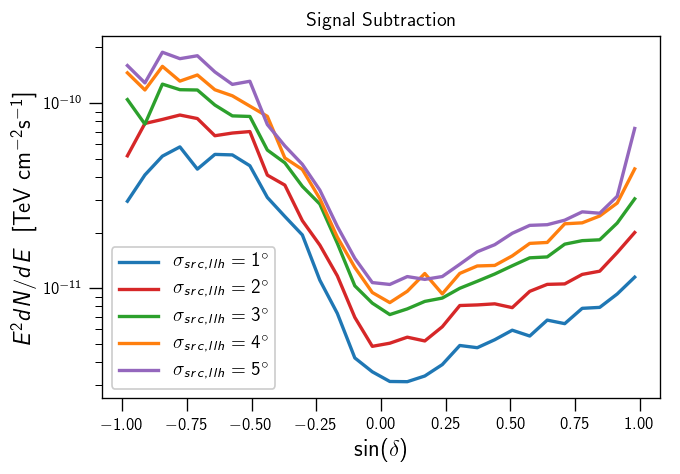

In [15]:
fig, ax = plt.subplots ()
plt.semilogy(sindec_array_30,disc_1_ss,label=r'$\sigma_{src,llh}=1^{\circ}$')
plt.semilogy(sindec_array_30,disc_2_ss,label=r'$\sigma_{src,llh}=2^{\circ}$')
plt.semilogy(sindec_array_30,disc_3_ss,label=r'$\sigma_{src,llh}=3^{\circ}$')
plt.semilogy(sindec_array_30,disc_4_ss,label=r'$\sigma_{src,llh}=4^{\circ}$')
plt.semilogy(sindec_array_30,disc_5_ss,label=r'$\sigma_{src,llh}=5^{\circ}$')
plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.title('Signal Subtraction')
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)